### 1. Prepare input and target data for model

In [33]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

# load the dataset
def load_dataset(filename, column):
	# load the dataset as a pandas DataFrame
	df = read_csv(filename)
	# split into input (X) and output (y) variables & convert to numPy array
	X = df.drop(column, axis = 1)
	y = df[column]
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
		
	# scale dataset
	scaler = preprocessing.MinMaxScaler()
	X_train_rescaled = scaler.fit_transform(X_train_enc)
	X_test_rescaled = scaler.fit_transform(X_test_enc)
	return X_train_rescaled, X_test_rescaled

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# load the dataset
X, y = load_dataset('mushrooms.csv', 'class')
X = X.drop('veil-type', axis = 1)
X_val = X.values
y_val = y.values
# split into train and test sets; 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.1, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

### 2. Compute Logistic Regression and accuracy

number of selected features:  10 

Accuracy using Chi2: 92.62

Classification Report for Chi2: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       400
           1       0.95      0.90      0.93       413

    accuracy                           0.93       813
   macro avg       0.93      0.93      0.93       813
weighted avg       0.93      0.93      0.93       813


Confusion matrix for Chi2: 


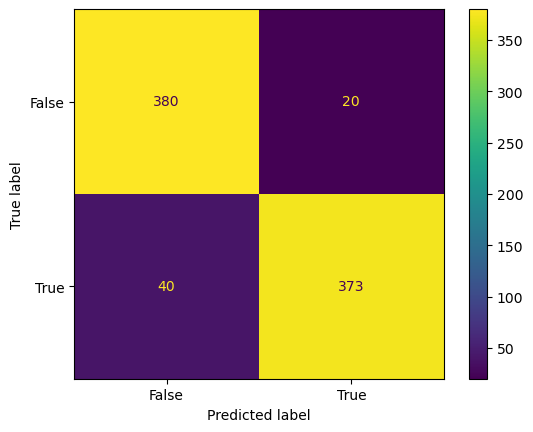

Accuracy using Mutual Information: 91.51

Classification Report for MI: 
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       400
           1       0.92      0.92      0.92       413

    accuracy                           0.92       813
   macro avg       0.92      0.92      0.92       813
weighted avg       0.92      0.92      0.92       813


Confusion matrix for MI: 


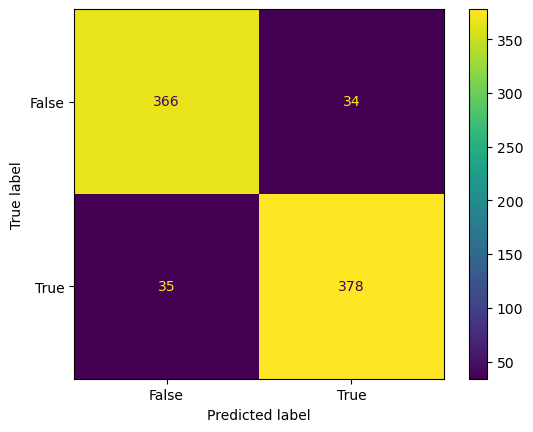

Accuracy using ALL features: 93.85

Classification Report for all features: 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       400
           1       0.95      0.93      0.94       413

    accuracy                           0.94       813
   macro avg       0.94      0.94      0.94       813
weighted avg       0.94      0.94      0.94       813


Confusion matrix for all features: 


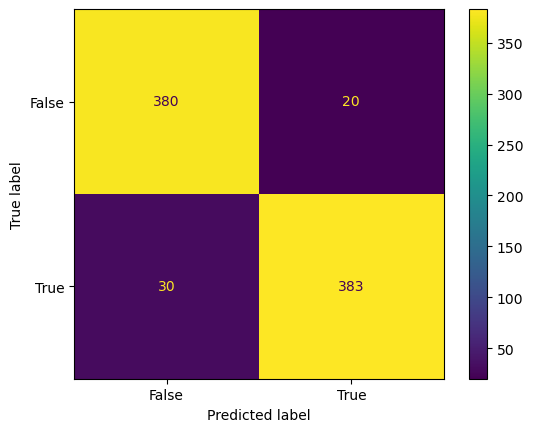

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# define how many features to select
number_of_features = 10
print('number of selected features: ', number_of_features, '\n')

# Feature reduction function
def select_features(X_train, y_train, X_test, reduction_func):
 fs = SelectKBest(score_func=reduction_func, k=number_of_features)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs

#### FEATURE SELECTION ####

# chi2 feature selection
X_train_fs_chi2, X_test_fs_chi2 = select_features(X_train_enc, y_train_enc, X_test_enc, chi2)

# mutual information feature selection
X_train_fs_mi, X_test_fs_mi = select_features(X_train_enc, y_train_enc, X_test_enc, mutual_info_classif)

#### MODEL FITTING ####

model = LogisticRegression(solver='lbfgs')

# Chi2 features
model.fit(X_train_fs_chi2, y_train_enc)
pred = model.predict(X_test_fs_chi2)
accuracy = accuracy_score(y_test_enc, pred)
print('Accuracy using Chi2: %.2f' % (accuracy*100))

print("\nClassification Report for Chi2: ")
print(classification_report(y_test_enc, pred))
cm = confusion_matrix(y_test_enc, pred)  # actual, pred
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
print("\nConfusion matrix for Chi2: ")
cm_display.plot()
plt.show()

# Mutual Information features
model.fit(X_train_fs_mi, y_train_enc)
pred = model.predict(X_test_fs_mi)
accuracy = accuracy_score(y_test_enc, pred)
print('Accuracy using Mutual Information: %.2f' % (accuracy*100))

print("\nClassification Report for MI: ")
print(classification_report(y_test_enc, pred))

cm = confusion_matrix(y_test_enc, pred)  # actual, pred
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
print("\nConfusion matrix for MI: ")
cm_display.plot()
plt.show()

# all features
model.fit(X_train_enc, y_train_enc)
pred = model.predict(X_test_enc)
accuracy = accuracy_score(y_test_enc, pred)
print('Accuracy using ALL features: %.2f' % (accuracy*100))

print("\nClassification Report for all features: ")
print(classification_report(y_test_enc, pred))
cm = confusion_matrix(y_test_enc, pred)  # actual, pred
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
print("\nConfusion matrix for all features: ")
cm_display.plot()
plt.show()


Since feature reduction always decreases accuracy comapred to using all features, we have decided to only train further models using all features.

### 3. Compute accuracy of Gaussian Naive Bayes

Accuracy of Naive Bayes: 90.90

Confusion matrix raw: 
[[363  37]
 [ 37 376]]


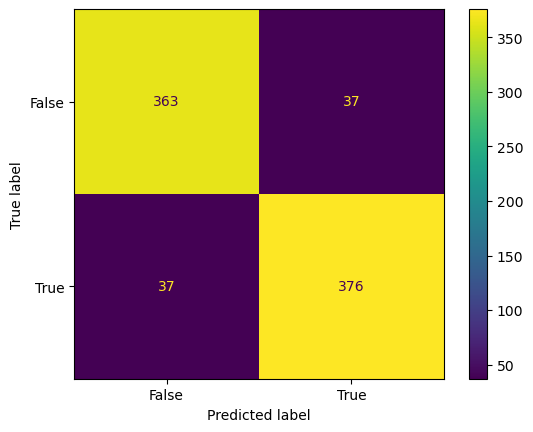


Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       400
           1       0.91      0.91      0.91       413

    accuracy                           0.91       813
   macro avg       0.91      0.91      0.91       813
weighted avg       0.91      0.91      0.91       813



In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

model = GaussianNB()
model.fit(X_train_enc, y_train_enc)
pred = model.predict(X_test_enc)

# 3. evaluate model
accuracy = accuracy_score(y_test_enc, pred)
print('Accuracy of Naive Bayes: %.2f' % (accuracy*100))

# 3b. confusion matrix
cm = confusion_matrix(y_test_enc, pred)  # actual, pred
print("\nConfusion matrix raw: ")
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

print("\nClassification Report : ")
print(classification_report(y_test_enc, pred))

### 4. Compute accuracy of Neural Network using All Features

#### 4a. Hyperparameter tuning

In [36]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV

# Performing some hyperparameter tuning (it can take aorund 3 minutes)
max_iterations = [200,500,800,1000]
hidden_layer_siz = [(100,), (50,), (100, 25), (25, 7), (70, 20), (12, 10), (5, 20)]
learning_rates = 0.1 * np.arange(1, 4)
param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations)

#set model
mlp = MLPClassifier(solver = 'adam', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

# For Grid Search
grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

# Train the model with grid search
grid_result = grid.fit(X_train_enc, y_train_enc)

# Print the best hyperparameters
print("Best parameters: ", grid.best_params_)



Best parameters:  {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'max_iter': 200}


#### 4b. Fitting the model with the tuned hyperparameters

Accuracy: 100.00

Confusion Matrix: 


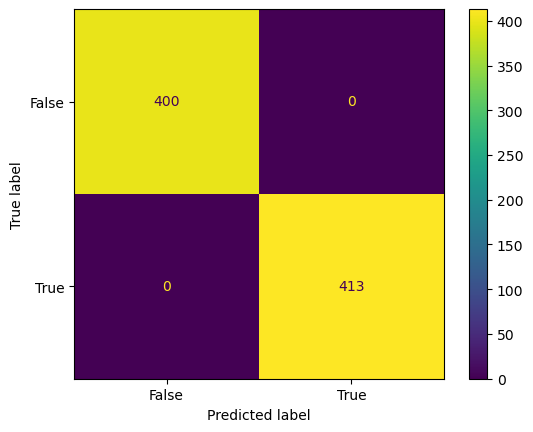


Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       413

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [37]:
from sklearn.metrics import classification_report

#set model with the best hyperparameters that we just computed
mlp = MLPClassifier(solver = 'adam', random_state = 42, activation = 'logistic', learning_rate_init = grid_result.best_params_["learning_rate_init"], batch_size = 100, hidden_layer_sizes = grid_result.best_params_["hidden_layer_sizes"], max_iter = grid_result.best_params_["max_iter"])

mlp.fit(X_train_enc, y_train_enc)
pred = mlp.predict(X_test_enc)

accuracy = accuracy_score(y_test_enc, pred)
print('Accuracy: %.2f' % (accuracy*100))

print("\nConfusion Matrix: ")
cm = confusion_matrix(y_test_enc, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

print("\nClassification Report : ")
print(classification_report(y_test_enc, pred))


#### 4c. k-fold cross validation

In [38]:
# Using sklearn function cross_validate()

from sklearn.model_selection import cross_validate

CV = cross_validate(mlp, X_test_enc, y_test_enc, cv=10, scoring=['accuracy', 'neg_mean_squared_error'])
print('Accuracy')
print(CV['test_accuracy'])
print('MSE')
print(-1*CV['test_neg_mean_squared_error'])

print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))
print('Average MSE = ', sum(-1 * CV['test_neg_mean_squared_error']) / len(CV['test_neg_mean_squared_error']))

Accuracy
[0.98780488 1.         1.         1.         1.         1.
 1.         1.         1.         0.98765432]
MSE
[0.01219512 0.         0.         0.         0.         0.
 0.         0.         0.         0.01234568]
Average Accuracy =  0.9975459199036436
Average MSE =  0.002454080096356519


In [39]:
# To find list of accuracy and MSE values
# Without using the sklearn function cross_validate()

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Pre-process data for K-Folding
df = read_csv('mushrooms.csv')
X = df.drop('class', axis = 1)
y = df['class']

oe = OrdinalEncoder()
oe.fit(X)
X = oe.transform(X)

le = LabelEncoder()
le.fit(y)
y = le.transform(y)

# step 1: randomize the dataset and create k equal size partitions
n_splits=10
kf = KFold(n_splits=n_splits)

acc = 0
mse = 0

i = 0 #keep track of batch number

# step 5: iterate k times with a different testing subset
for train_indices, test_indices in kf.split(X):

    # step 2-3: use k-1/k^th partition for the training/testing model
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1
    
    # perform the training similar to Q1
    #this was based on the requirements in Q1
    mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)
    mlp.fit(X[start_train:stop_train], y[start_train:stop_train])
    pred = mlp.predict(X[start_test:stop_test])
    
    # step 4: record the evaluating scores
    i+=1
    acc += accuracy_score(y[start_test:stop_test], pred)
    mse += mean_squared_error(y[start_test:stop_test], pred)
    
    print("\nAccuracy for batch ", i, " : ", accuracy_score(y[start_test:stop_test], pred))
    print("Mean Square Error for batch ", i, " : ", mean_squared_error(y[start_test:stop_test], pred))

# step 6: find the average and select the batch with highest evaluation scores
print('\nAverage Accuracy = ', acc / n_splits)
print('Average MSE = ', mse / n_splits)


Accuracy for batch  1  :  1.0
Mean Square Error for batch  1  :  0.0

Accuracy for batch  2  :  0.8646986469864698
Mean Square Error for batch  2  :  0.13530135301353013

Accuracy for batch  3  :  0.9261992619926199
Mean Square Error for batch  3  :  0.07380073800738007

Accuracy for batch  4  :  0.997539975399754
Mean Square Error for batch  4  :  0.0024600246002460025

Accuracy for batch  5  :  1.0
Mean Square Error for batch  5  :  0.0

Accuracy for batch  6  :  0.9926108374384236
Mean Square Error for batch  6  :  0.007389162561576354

Accuracy for batch  7  :  0.9248768472906403
Mean Square Error for batch  7  :  0.07512315270935961

Accuracy for batch  8  :  0.9692118226600985
Mean Square Error for batch  8  :  0.03078817733990148

Accuracy for batch  9  :  0.9802955665024631
Mean Square Error for batch  9  :  0.019704433497536946

Accuracy for batch  10  :  0.9766009852216748
Mean Square Error for batch  10  :  0.023399014778325122

Average Accuracy =  0.9632033943492144
Averag